# Análise dos Microdados do ENEM 2023

### Importação de bibliotecas e dos dados

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter
!pip install seaborn
import seaborn as sns


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [121]:
microdadosEnem = pd.read_csv("C:/Users/Samuel Marlon/Desktop/samuel/Ciência de Dados PUC/analise_enem/microdados_enem_2023/DADOS/MICRODADOS_ENEM_2023.csv", sep=";", encoding='ISO-8859-1')

In [122]:
microdadosEnem

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933950,210061959676,2023,12,M,1,1,1,1,6,1,...,B,A,A,C,A,B,E,A,A,B
3933951,210061950911,2023,1,F,1,1,2,3,0,1,...,B,A,B,C,B,B,B,B,C,B
3933952,210061965966,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,B
3933953,210061932304,2023,2,M,1,1,1,2,0,3,...,B,B,B,C,A,A,D,A,C,B


In [123]:
# Verificando as colunas do dataset
microdadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [124]:
# Selecionando as colunas que serão usadas na análise
colunasSelecionadasEnem = ['TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC','SG_UF_PROVA','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO','NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']

In [125]:
microdadosEnemSelecionado = microdadosEnem.filter(items=colunasSelecionadasEnem)

In [126]:
microdadosEnemSelecionado

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,14,M,2,1,1,1,17,1,NaN,0,...,C,C,B,B,A,B,B,A,A,B
1,12,M,2,1,0,1,16,1,NaN,0,...,B,A,B,B,A,A,C,A,D,B
2,6,F,1,1,1,1,0,1,NaN,0,...,B,A,A,B,A,A,A,A,A,B
3,2,F,1,3,1,2,0,2,1.0,0,...,A,A,A,B,A,A,D,A,A,B
4,3,F,1,3,1,2,0,2,1.0,0,...,A,A,A,B,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933950,12,M,1,1,1,1,6,1,NaN,0,...,B,A,A,C,A,B,E,A,A,B
3933951,1,F,1,1,2,3,0,1,NaN,1,...,B,A,B,C,B,B,B,B,C,B
3933952,3,F,1,3,1,2,0,2,1.0,0,...,A,A,A,B,A,A,B,A,A,B
3933953,2,M,1,1,1,2,0,3,1.0,0,...,B,B,B,C,A,A,D,A,C,B


In [127]:
microdadosEnemSelecionado.columns.values

array(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'SG_UF_PROVA', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TX_RESPOSTAS_CN',
       'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT',
       'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001',
       'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
       'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017',
       'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025'],
      dtype=object)

In [128]:
# Verificando valores nulos
microdadosEnemSelecionado.isna().sum()

TP_FAIXA_ETARIA                 0
TP_SEXO                         0
TP_ESTADO_CIVIL                 0
TP_COR_RACA                     0
TP_NACIONALIDADE                0
TP_ST_CONCLUSAO                 0
TP_ANO_CONCLUIU                 0
TP_ESCOLA                       0
TP_ENSINO                 2594874
IN_TREINEIRO                    0
CO_MUNICIPIO_ESC          2975449
NO_MUNICIPIO_ESC          2975449
SG_UF_ESC                 2975449
TP_DEPENDENCIA_ADM_ESC    2975449
TP_LOCALIZACAO_ESC        2975449
SG_UF_PROVA                     0
TP_PRESENCA_CN                  0
TP_PRESENCA_CH                  0
TP_PRESENCA_LC                  0
TP_PRESENCA_MT                  0
NU_NOTA_CN                1241528
NU_NOTA_CH                1111312
NU_NOTA_LC                1111312
NU_NOTA_MT                1241528
TX_RESPOSTAS_CN           1241528
TX_RESPOSTAS_CH           1111312
TX_RESPOSTAS_LC           1111312
TX_RESPOSTAS_MT           1241528
TP_LINGUA                       0
TX_GABARITO_CN

## Nº de registros por estado

In [129]:
coluna_estado_prova = microdadosEnemSelecionado['SG_UF_PROVA']

In [130]:
coluna_estado_prova.value_counts()

SG_UF_PROVA
SP    590767
MG    358575
BA    324268
RJ    282296
CE    241960
PA    229162
PE    218859
PR    166506
MA    165756
RS    159919
GO    149110
PB    124511
RN    100706
PI     99639
AM     92916
SC     91263
AL     82760
ES     73724
DF     72975
SE     65540
MT     63912
MS     47455
RO     36038
TO     32618
AP     28807
AC     24274
RR      9639
Name: count, dtype: int64

In [131]:
freq_estado = coluna_estado_prova.value_counts()

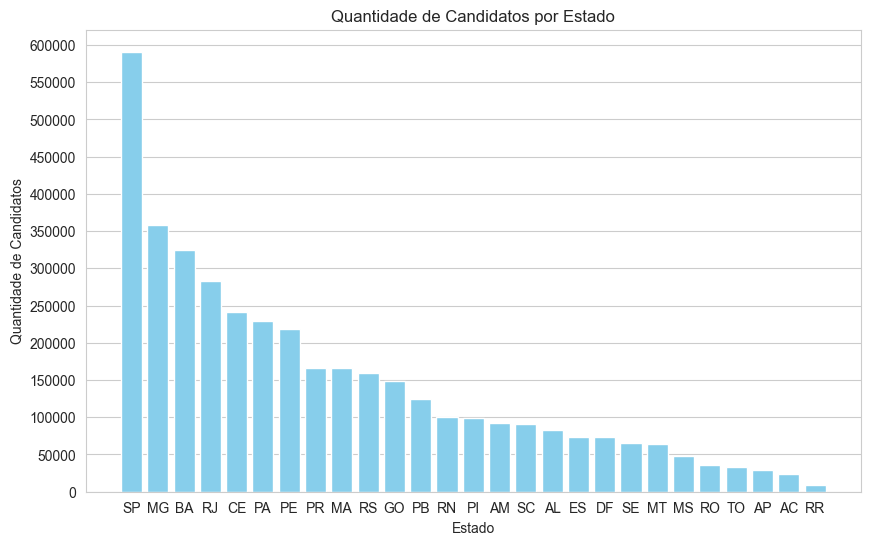

In [132]:
plt.figure(figsize=(10,6))
grafico = plt.bar(freq_estado.index, freq_estado, color='skyblue')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Candidatos')
plt.title('Quantidade de Candidatos por Estado')
plt.grid(axis = 'x')
plt.yticks(range(0, 650000, 50000))
plt.show()

## Nº de registros por faixa etária

In [133]:
coluna_faixa_etaria = microdadosEnemSelecionado['TP_FAIXA_ETARIA']

In [134]:
coluna_faixa_etaria.value_counts().sort_index()

TP_FAIXA_ETARIA
1     347434
2     753800
3     905047
4     431592
5     267383
6     183401
7     137884
8     111813
9      91359
10     73127
11    246292
12    133381
13     96927
14     67135
15     40791
16     24619
17     13439
18      5503
19      2161
20       867
Name: count, dtype: int64

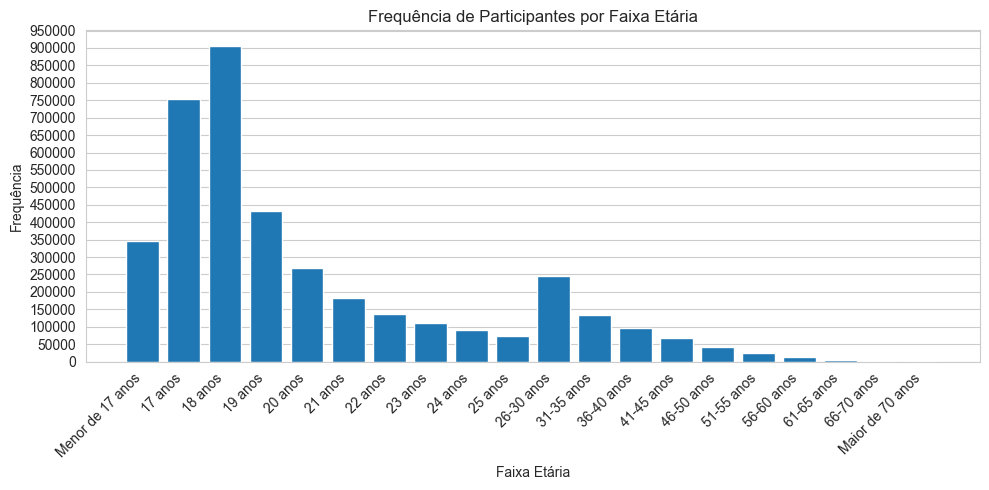

In [135]:
frequencia_faixa_etaria = coluna_faixa_etaria.value_counts().sort_index()
faixas_etarias = {
    1: 'Menor de 17 anos', 2: '17 anos', 3: '18 anos', 4: '19 anos', 5: '20 anos',
    6: '21 anos', 7: '22 anos', 8: '23 anos', 9: '24 anos', 10: '25 anos',
    11: '26-30 anos', 12: '31-35 anos', 13: '36-40 anos', 14: '41-45 anos',
    15: '46-50 anos', 16: '51-55 anos', 17: '56-60 anos', 18: '61-65 anos',
    19: '66-70 anos', 20: 'Maior de 70 anos'
}

# Converte os índices numéricos para rótulos descritivos
frequencia_faixa_etaria.index = frequencia_faixa_etaria.index.map(faixas_etarias)

# Gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(frequencia_faixa_etaria.index, frequencia_faixa_etaria.values, color='tab:blue')

# Ajuste de títulos e rótulos
plt.xlabel('Faixa Etária')
plt.ylabel('Frequência')
plt.title('Frequência de Participantes por Faixa Etária')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos para facilitar a leitura
plt.tight_layout()  # Ajusta para evitar sobreposição
plt.yticks(range(0, 1000000, 50000))
plt.grid(axis = 'x')

plt.show()

## Nº de registros por sexo

In [136]:
# Seleciona a coluna que indica o sexo dos participantes
coluna_sexo = microdadosEnemSelecionado['TP_SEXO']

# Conta a frequência de cada valor (número de participantes do sexo masculino e feminino)
freq_sexo = coluna_sexo.value_counts()
print(freq_sexo) 

TP_SEXO
F    2411185
M    1522770
Name: count, dtype: int64


In [137]:
# Converte as frequências absolutas para percentuais (dividindo cada valor pelo total e multiplicando por 100)
porcent_sexo = [100 * x / freq_sexo.sum() for x in freq_sexo]
porcent_sexo 

[np.float64(61.291626365832855), np.float64(38.708373634167145)]

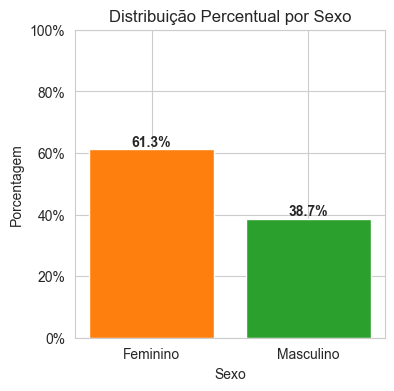

In [138]:
# Define as cores para cada barra
bar_colors = ['tab:orange', 'tab:green']

rotulo_sexo = ['Feminino', 'Masculino']

plt.figure(figsize=(4, 4))

plt.bar(rotulo_sexo, porcent_sexo, color=bar_colors)

# Define o formato do eixo y como porcentagem para que os valores sejam exibidos com o símbolo '%' 
plt.gca().yaxis.set_major_formatter(PercentFormatter())

# Ajusta o limite superior do eixo Y para 100%, garantindo que toda a escala percentual seja exibida
plt.ylim(0, 100)

plt.title('Distribuição Percentual por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Porcentagem')

# Exibe o valor exato da porcentagem acima de cada barra
for i, v in enumerate(porcent_sexo):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')  # v+1 Coloca o valor da porcentagem 1 unidade acima da barra
plt.show()

## Desempenho em Redação por Renda da Familía

In [139]:
colunas_redacao_renda = microdadosEnemSelecionado[['Q006', 'NU_NOTA_REDACAO']]
colunas_redacao_renda.head()

,Q006,NU_NOTA_REDACAO
0,F,NaN
1,H,NaN
2,C,700.0
3,C,880.0
4,B,560.0


In [140]:
#Limpa os dados retirando os valores N/A (NaN) da coluna NU_NOTA_REDACAO
colunas_redacao_renda = colunas_redacao_renda.dropna() 
colunas_redacao_renda.head()

,Q006,NU_NOTA_REDACAO
2,C,700.0
3,C,880.0
4,B,560.0
9,F,600.0
10,B,860.0


In [214]:
# Descirção geral dos dados da relação entre nota da redação e renda familiar
descricao_redacao_renda = colunas_redacao_renda.groupby('Q006').describe()
descricao_redacao_renda

NU_NOTA_REDACAO                                                          
               count        mean         std  min    25%    50%    75%     max
Q006                                                                          
A           166267.0  521.426982  218.096492  0.0  420.0  540.0  640.0  1000.0
B           828092.0  559.034697  216.727346  0.0  460.0  560.0  700.0  1000.0
C           439169.0  592.036779  205.930055  0.0  480.0  600.0  720.0  1000.0
D           311880.0  613.938374  203.772513  0.0  520.0  620.0  760.0  1000.0
E           220090.0  635.839884  201.295260  0.0  520.0  640.0  780.0  1000.0
F           132945.0  654.038136  199.483481  0.0  540.0  660.0  800.0  1000.0
G           210022.0  674.401063  195.755006  0.0  560.0  680.0  840.0  1000.0
H           114874.0  693.646430  193.285565  0.0  580.0  700.0  860.0  1000.0
I            71944.0  708.954187  188.540665  0.0  600.0  720.0  860.0  1000.0
J            63847.0  720.681316  186.200953  0.0  600.0  740.0  880.0  1000.0
K            51117.0  728.751296  182.243240  0.0  620.0  760.0  880.0  1000.0
L            34106.0  735.145722  182.132437  0.0  620.0  760.0  880.0  1000.0
M            29032.0  744.272527  178.242256  0.0  640.0  780.0  880.0  1000.0
N            36014.0  749.558505  174.254447  0.0  640.0  780.0  880.0  1000.0
O            35846.0  756.185906  173.069000  0.0  640.0  800.0  900.0  1000.0
P            33266.0  765.863645  169.549871  0.0  660.0  800.0  900.0  1000.0
Q            44132.0  769.834134  169.424352  0.0  680.0  800.0  900.0  1000.0

### Valores de cada faixa de renda familiar:

    'A': "Nenhuma Renda", 'B': 'Até R$ 1.320,00', 'C': 'De R$ 1.320,01 até R$ 1.980,00', 
    'D': 'De R$ 1.980,01 até R$ 2.640,00', 'E': 'De R$ 2.640,01 até R$ 3.300,00', 'F': 'De R$ 3.300,01 até R$ 3.960,00', 
    'G': 'De R$ 3.960,01 até R$ 5.280,00','H': 'De R$ 5.280,01 até R$ 6.600,00', 'I': 'De R$ 6.600,01 até R$ 7.920,00', 
    'J': 'De R$ 7.920,01 até R$ 9.240,00', 'K': 'De R$ 9.240,01 até R$ 10.560,00', 'L': 'De R$ 10.560,01 até R$ 11.880,00', 
    'M': 'De R$ 11.880,01 até R$ 13.200,00', 'N': 'De R$ 13.200,01 até R$ 15.840,00', 'O': 'De R$ 15.840,01 até R$ 19.800,00',
    'P': 'De R$ 19.800,01 até R$ 26.400,00', 'Q': 'Acima de R$ 26.400,00'

  

Q006
A    [[Axes(0.125,0.11;0.775x0.77)]]
B    [[Axes(0.125,0.11;0.775x0.77)]]
C    [[Axes(0.125,0.11;0.775x0.77)]]
D    [[Axes(0.125,0.11;0.775x0.77)]]
E    [[Axes(0.125,0.11;0.775x0.77)]]
F    [[Axes(0.125,0.11;0.775x0.77)]]
G    [[Axes(0.125,0.11;0.775x0.77)]]
H    [[Axes(0.125,0.11;0.775x0.77)]]
I    [[Axes(0.125,0.11;0.775x0.77)]]
J    [[Axes(0.125,0.11;0.775x0.77)]]
K    [[Axes(0.125,0.11;0.775x0.77)]]
L    [[Axes(0.125,0.11;0.775x0.77)]]
M    [[Axes(0.125,0.11;0.775x0.77)]]
N    [[Axes(0.125,0.11;0.775x0.77)]]
O    [[Axes(0.125,0.11;0.775x0.77)]]
P    [[Axes(0.125,0.11;0.775x0.77)]]
Q    [[Axes(0.125,0.11;0.775x0.77)]]
dtype: object

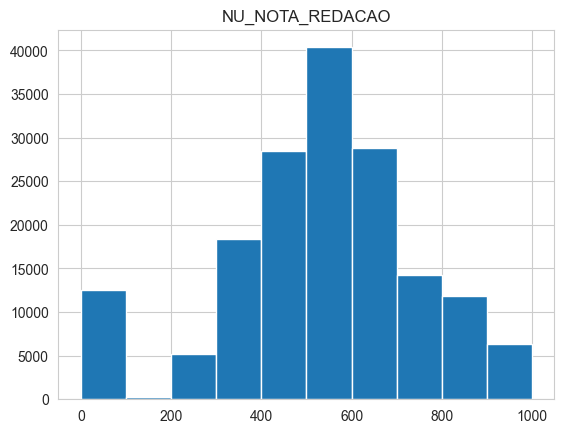

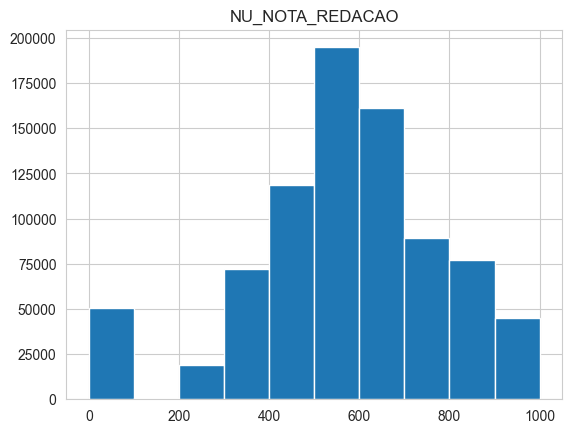

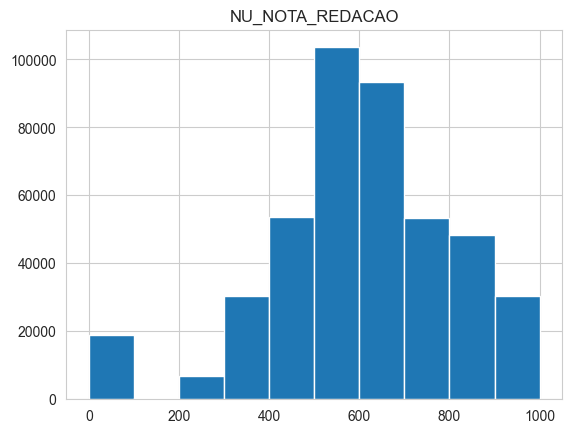

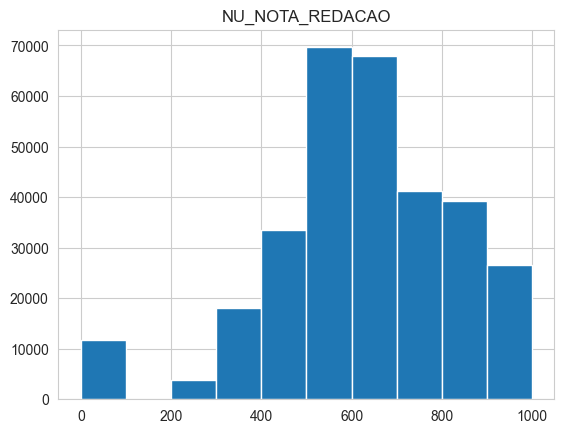

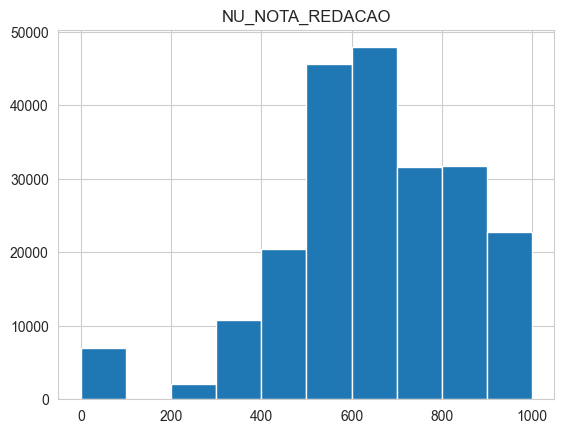

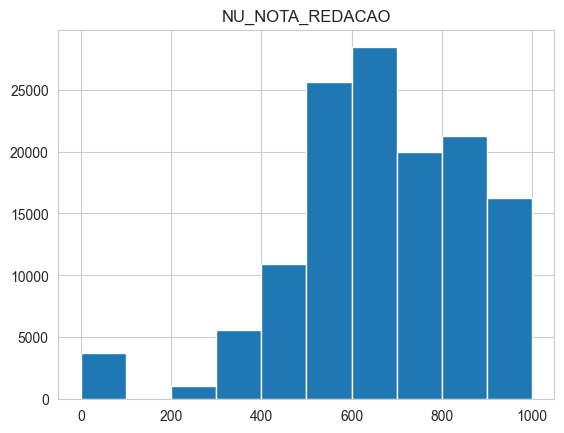

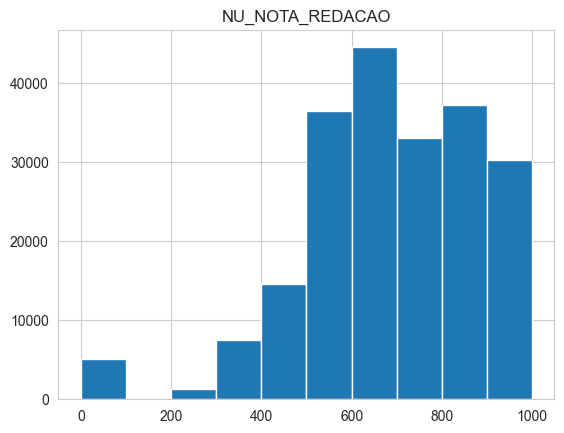

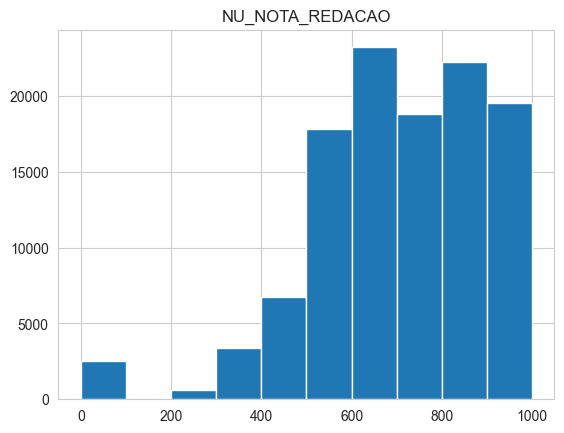

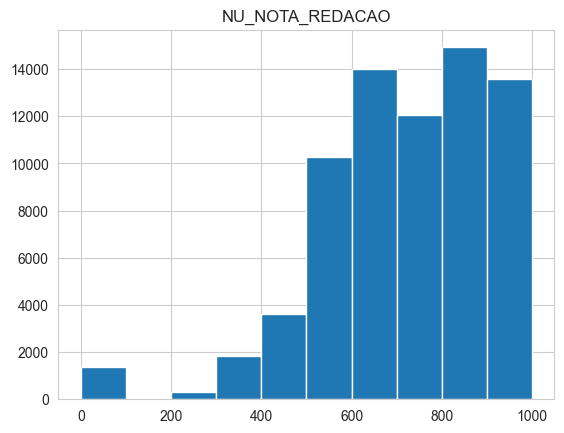

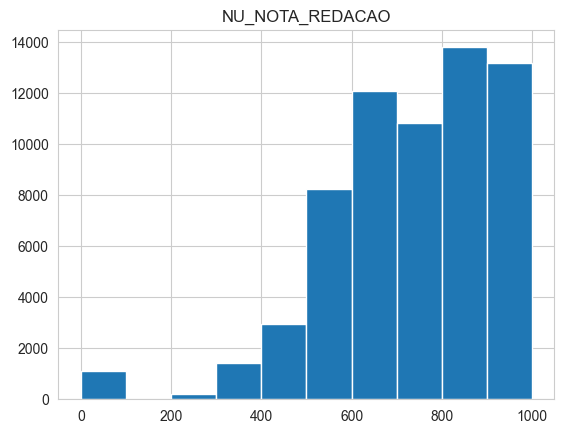

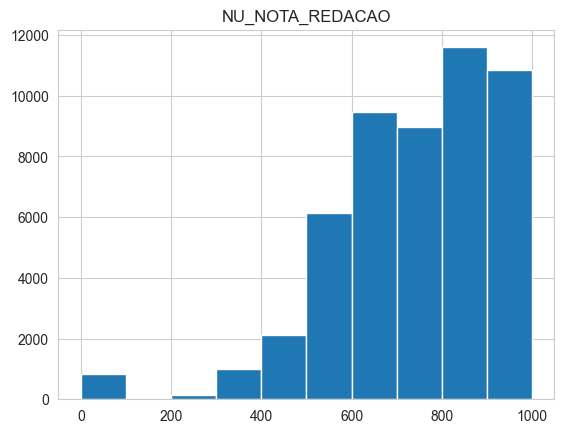

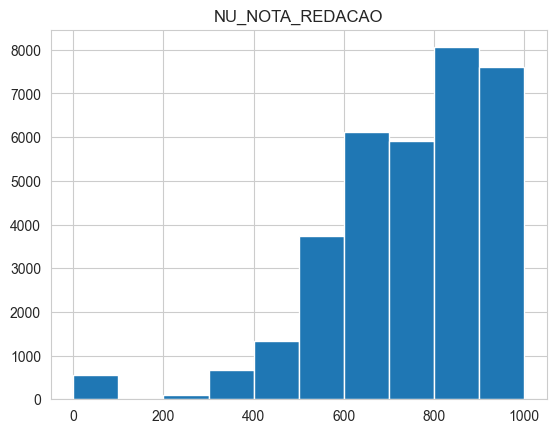

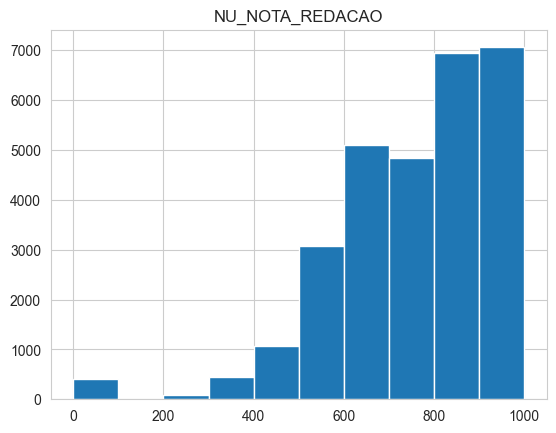

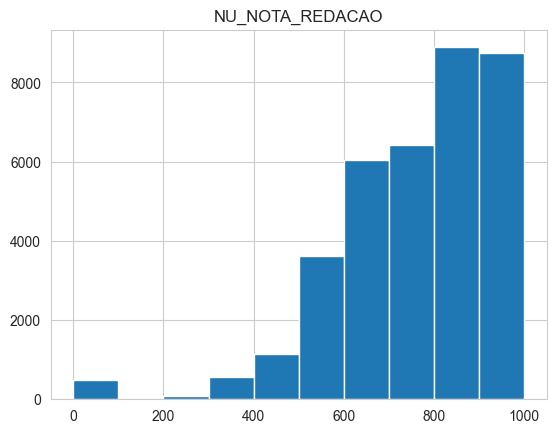

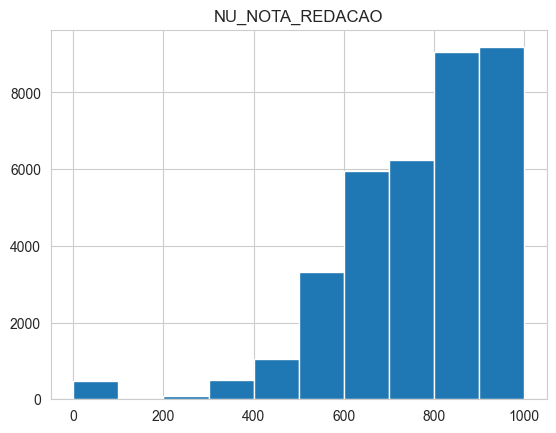

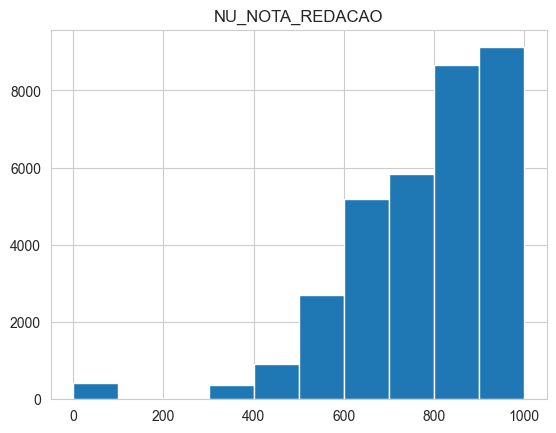

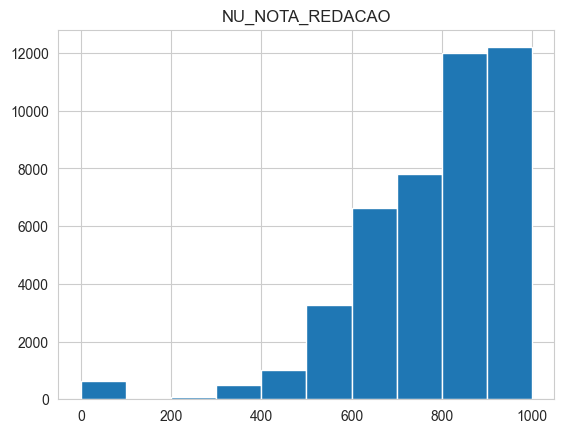

In [142]:
# Gera um histograma da frequência de notas para cada faixa de renda familiar
colunas_redacao_renda.groupby('Q006').hist()

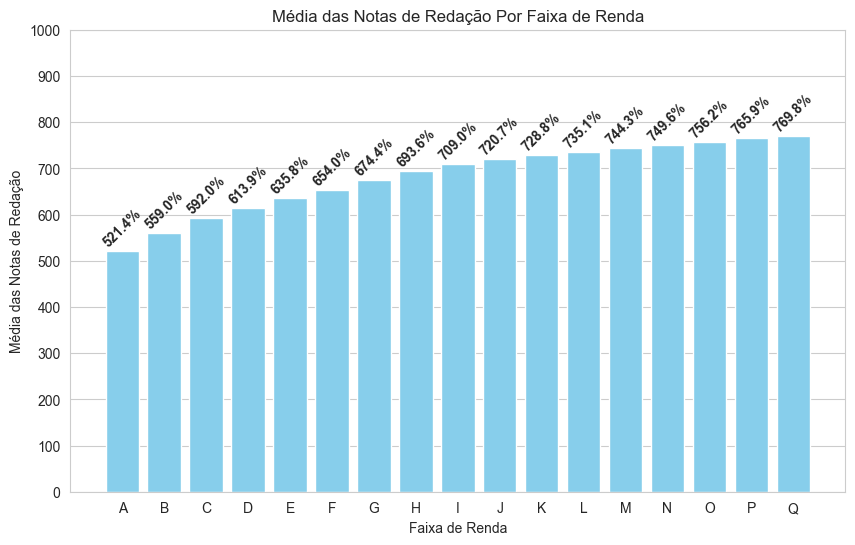

In [219]:
# Gráfico de barras da média das notas de redação por faixa de renda familiar
media_redacao_renda = colunas_redacao_renda.groupby('Q006')['NU_NOTA_REDACAO'].mean()
plt.figure(figsize=(10, 6))
plt.bar(media_redacao_renda.index, media_redacao_renda.values, color='skyblue')
plt.xlabel('Faixa de Renda')
plt.ylabel('Média das Notas de Redação')
plt.title('Média das Notas de Redação Por Faixa de Renda')
plt.ylim(0, 1000)
plt.yticks(range(0, 1100, 100))
plt.grid(axis = 'x')
for i, v in enumerate(media_redacao_renda):
    plt.text(i, v + 10, f'{v:.1f}%', ha='center', fontweight='bold', rotation=45)  # v+10 Coloca o valor da porcentagem 10 unidade acima da barra

plt.show()

### Valores de cada faixa de renda familiar:
        A   Nenhuma Renda
        B	Até R$ 1.320,00
    C	De R$ 1.320,01 até R$ 1.980,00.
    D	De R$ 1.980,01 até R$ 2.640,00.
    E	De R$ 2.640,01 até R$ 3.300,00.
    F	De R$ 3.300,01 até R$ 3.960,00.
    G	De R$ 3.960,01 até R$ 5.280,00.
    H	De R$ 5.280,01 até R$ 6.600,00.
    I	De R$ 6.600,01 até R$ 7.920,00.
    J	De R$ 7.920,01 até R$ 9240,00.
    K	De R$ 9.240,01 até R$ 10.560,00.
    L	De R$ 10.560,01 até R$ 11.880,00.
    M	De R$ 11.880,01 até R$ 13.200,00.
    N	De R$ 13.200,01 até R$ 15.840,00.
    O	De R$ 15.840,01 até R$19.800,00.
    P	De R$ 19.800,01 até R$ 26.400,00.
    Q	Acima de R$ 26.400,00.


C:\Users\Samuel Marlon\AppData\Local\Temp\ipykernel_24580\2023584576.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=a, x='Q006', y='NU_NOTA_REDACAO', palette='pastel')


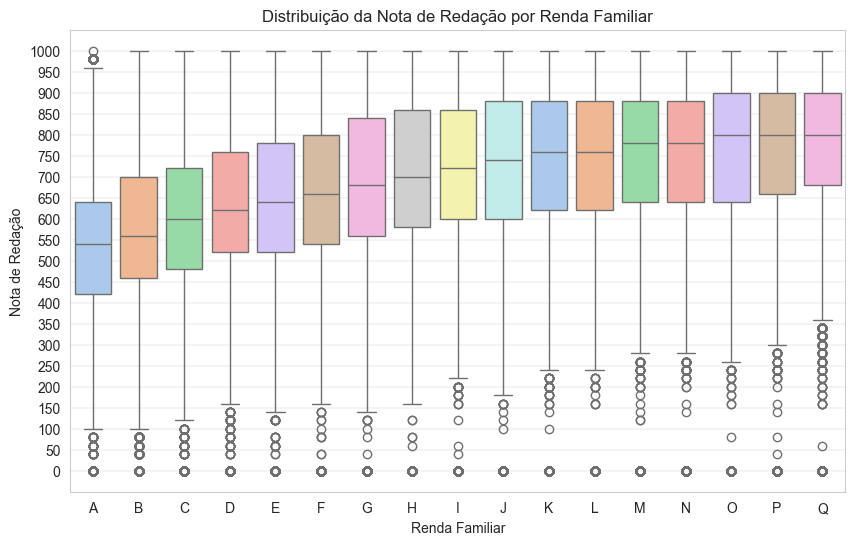

In [144]:
a = microdadosEnemSelecionado[['Q006', 'NU_NOTA_REDACAO']].dropna()
a = a.sort_values('Q006')
# Configuração do gráfico
plt.figure(figsize=(10, 6))

# Criação do box plot
sns.boxplot(data=a, x='Q006', y='NU_NOTA_REDACAO', palette='pastel')

# Adiciona os rótulos
plt.xlabel('Renda Familiar')
plt.ylabel('Nota de Redação')
plt.title('Distribuição da Nota de Redação por Renda Familiar')
plt.grid(axis = 'y', linewidth = 0.3)
plt.yticks(range(0, 1050, 50))
# Exibe o gráfico
plt.show()

C:\Users\Samuel Marlon\AppData\Local\Temp\ipykernel_24580\3879345654.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=a, x='Q006', y='NU_NOTA_REDACAO', palette='pastel')


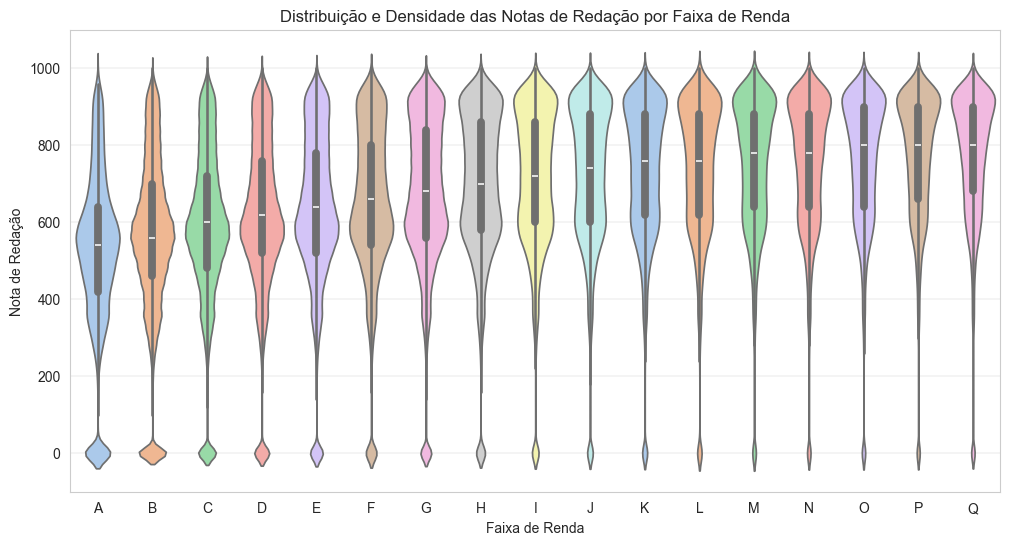

In [145]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=a, x='Q006', y='NU_NOTA_REDACAO', palette='pastel')
plt.xlabel("Faixa de Renda")
plt.ylabel("Nota de Redação")
plt.title("Distribuição e Densidade das Notas de Redação por Faixa de Renda")
plt.grid(axis = 'y', linewidth = 0.3)
plt.show()

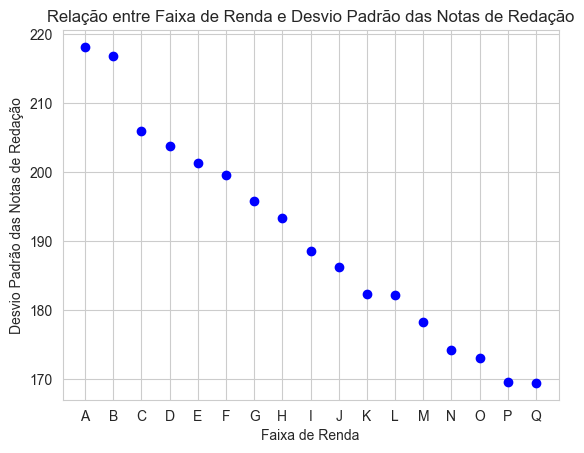

In [146]:
# Gráfico de dispersão do desvio padrão das notas de redação por renda familiar

desvio_padrao_renda_redacao = colunas_redacao_renda.groupby('Q006')['NU_NOTA_REDACAO'].std()

# Cria o gráfico de dispersão
plt.scatter(desvio_padrao_renda_redacao.index, desvio_padrao_renda_redacao.values, color='blue', marker='o')
plt.xlabel('Faixa de Renda')
plt.ylabel('Desvio Padrão das Notas de Redação')
plt.title('Relação entre Faixa de Renda e Desvio Padrão das Notas de Redação')
plt.grid(True)
plt.show()

### Interpretações sobre a relação entre nota de redação e renda familiar

- A renda impacta diretamente na nota de redação dos candidatos;
- Quanto maior a renda familiar, maior é a nota em redação;
- Quanto maior a renda familiar, menor é o desvio padrão, ou seja, a distribuição das notas se dá de forma mais coesa.

## Relação entre cor/raça e nota da redação 

In [147]:
## Proporção de Cor/Raça declarado pelos candidatos de 2023

In [148]:
coluna_raca = microdadosEnemSelecionado['TP_COR_RACA']

In [149]:
freq_raca_ordenada = coluna_raca.value_counts().sort_index()
freq_raca_ordenada

TP_COR_RACA
0      52575
1    1575848
2     509511
3    1706798
4      64512
5      24711
Name: count, dtype: int64

In [150]:
# Converte as frequências absolutas para percentuais (dividindo cada valor pelo total e multiplicando por 100)
porcent_raca = [100 * x / freq_raca_ordenada.sum() for x in freq_raca_ordenada]
porcent_raca

[np.float64(1.3364413166902012),
 np.float64(40.05760106559429),
 np.float64(12.951622476617043),
 np.float64(43.38631224810655),
 np.float64(1.6398764093641132),
 np.float64(0.6281464836277995)]

In [174]:
nome_raca = { 
    0: 'Ñ declarado', 1: 'Branca', 2: 'Preta', 3: 'Parda', 
    4: 'Amarela', 5: 'Indígena', 6: 'Não dispõe da informação'
}

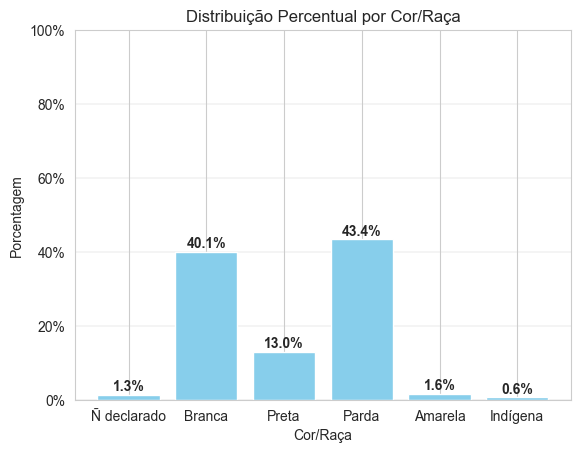

In [175]:
nomes_raca_ordenados = [nome_raca[i] for i in freq_raca_ordenada.index]

plt.bar(nomes_raca_ordenados, porcent_raca, color='skyblue')
plt.xlabel('Cor/Raça')
plt.ylabel('Porcentagem')
plt.title('Distribuição Percentual por Cor/Raça')
plt.grid(axis = 'y', linewidth = 0.3)
#plt.xticks(rotation=90)

# Define o formato do eixo y como porcentagem para que os valores sejam exibidos com o símbolo '%' 
plt.gca().yaxis.set_major_formatter(PercentFormatter())
# Ajusta o limite superior do eixo Y para 100%, garantindo que toda a escala percentual seja exibida
plt.ylim(0, 100)

# Exibe o valor exato da porcentagem acima de cada barra
for i, v in enumerate(porcent_raca):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')  # v+1 Coloca o valor da porcentagem 1 unidade acima da barra
plt.show()

In [153]:
colunas_redacao_raca = microdadosEnemSelecionado[['TP_COR_RACA', 'NU_NOTA_REDACAO']]
colunas_redacao_raca

,TP_COR_RACA,NU_NOTA_REDACAO
0,1,NaN
1,1,NaN
2,1,700.0
3,3,880.0
4,3,560.0
...,...,...
3933950,1,540.0
3933951,1,640.0
3933952,3,NaN
3933953,1,600.0


In [154]:
#Limpa os dados retirando os valores N/A (NaN) da coluna NU_NOTA_REDACAO
colunas_redacao_raca = colunas_redacao_raca.dropna() 
colunas_redacao_raca.head()

,TP_COR_RACA,NU_NOTA_REDACAO
2,1,700.0
3,3,880.0
4,3,560.0
9,1,600.0
10,3,860.0


In [207]:
# Aplicar o mapeamento para substituir os valores numéricos pelos rótulos de legenda
colunas_redacao_raca_temp = colunas_redacao_raca.copy()
colunas_redacao_raca_temp['TP_COR_RACA'] = colunas_redacao_raca_temp['TP_COR_RACA'].replace(nome_raca)

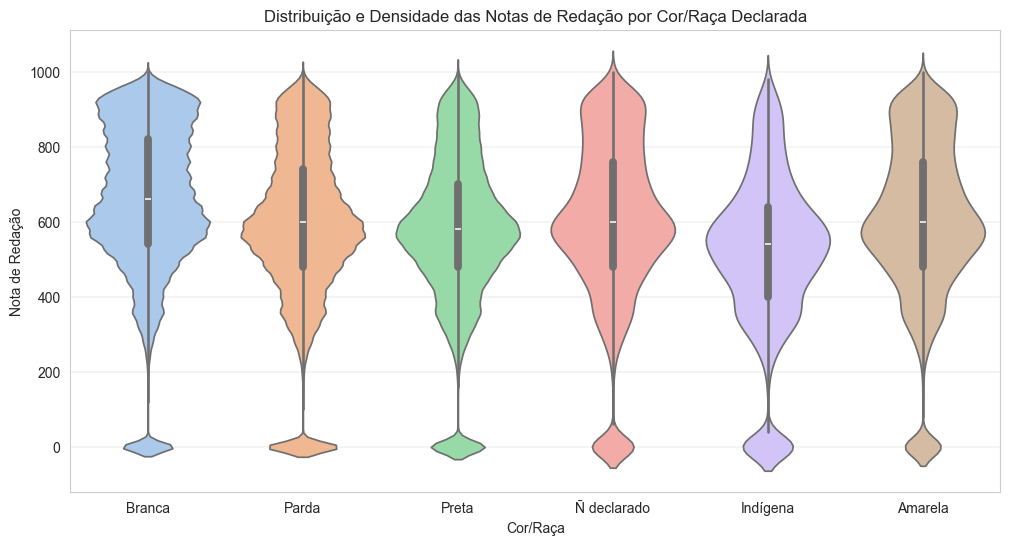

In [208]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=colunas_redacao_raca_temp, x='TP_COR_RACA', y='NU_NOTA_REDACAO', hue='TP_COR_RACA', palette='pastel', legend='auto')
plt.xlabel("Cor/Raça")
plt.ylabel("Nota de Redação")
plt.title("Distribuição e Densidade das Notas de Redação por Cor/Raça Declarada")
plt.grid(axis = 'y', linewidth = 0.3)
plt.show()

In [156]:
descricao_redacao_raca = colunas_redacao_raca.groupby('TP_COR_RACA')['NU_NOTA_REDACAO'].describe()
descricao_redacao_raca

,count,mean,std,min,25%,50%,75%,max
TP_COR_RACA,,,,,,,,
0,35071.0,597.643067,225.413499,0.0,480.0,600.0,760.0,1000.0
1,1210061.0,660.780159,205.765470,0.0,540.0,660.0,820.0,1000.0
2,336815.0,572.509538,208.828961,0.0,480.0,580.0,700.0,1000.0
3,1180027.0,589.174265,216.648002,0.0,480.0,600.0,740.0,1000.0
4,45161.0,603.862182,215.281612,0.0,480.0,600.0,760.0,1000.0
5,15508.0,511.862265,219.077163,0.0,400.0,540.0,640.0,980.0


0: 'Não declarado', 1: 'Branca', 2: 'Preta', 3: 'Parda', 
4: 'Amarela', 5: 'Indígena', 6: 'Não dispõe da informação'

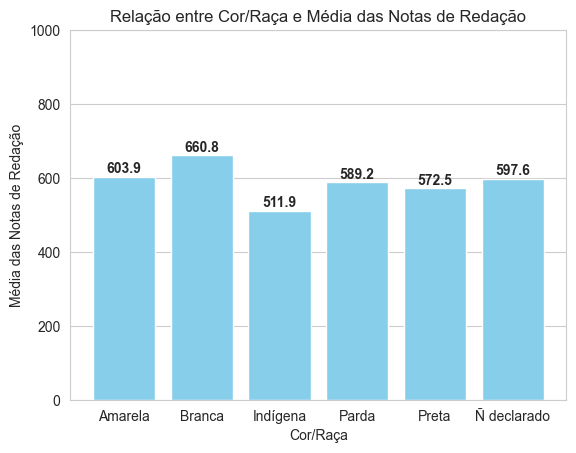

In [213]:
media_redacao_raca = colunas_redacao_raca_temp.groupby('TP_COR_RACA')['NU_NOTA_REDACAO'].mean()

plt.bar(media_redacao_raca.index, media_redacao_raca.values, color='skyblue')
plt.xlabel('Cor/Raça')
plt.ylabel('Média das Notas de Redação')
plt.title('Relação entre Cor/Raça e Média das Notas de Redação')
plt.ylim(0, 1000)
plt.grid(axis = 'x')
# Exibe o valor exato da porcentagem acima de cada barra
for i, v in enumerate(media_redacao_raca.values):
    plt.text(i, v + 10, f'{v:.1f}', ha='center', fontweight='bold')  # v+10 Coloca o valor da porcentagem 10 unidade acima da barra
plt.show()

0: 'Não declarado', 1: 'Branca', 2: 'Preta', 3: 'Parda', 
4: 'Amarela', 5: 'Indígena', 6: 'Não dispõe da informação'

## Relação escolaridade do pai e nota da redação

In [158]:
colunas_redacao_escpai = microdadosEnemSelecionado[['Q001', 'NU_NOTA_REDACAO']].dropna()
colunas_redacao_escpai

,Q001,NU_NOTA_REDACAO
2,H,700.0
3,D,880.0
4,B,560.0
9,H,600.0
10,F,860.0
...,...,...
3933946,B,500.0
3933948,E,600.0
3933950,C,540.0
3933951,F,640.0


In [159]:
descricao_colunas_redacao_escpai = colunas_redacao_escpai.groupby('Q001')['NU_NOTA_REDACAO'].describe()
descricao_colunas_redacao_escpai

,count,mean,std,min,25%,50%,75%,max
Q001,,,,,,,,
A,103010.0,512.772158,216.701960,0.0,400.0,540.0,640.0,980.0
B,435750.0,558.234584,209.333486,0.0,460.0,560.0,680.0,1000.0
C,350945.0,588.545328,211.530793,0.0,480.0,600.0,720.0,1000.0
D,314550.0,603.142394,211.770855,0.0,500.0,600.0,760.0,1000.0
E,848825.0,636.838783,206.025150,0.0,520.0,640.0,800.0,1000.0
F,279990.0,709.339548,191.004889,0.0,600.0,720.0,860.0,1000.0
G,222406.0,732.040952,187.127067,0.0,620.0,760.0,880.0,1000.0
H,267167.0,559.592839,218.296744,0.0,460.0,580.0,700.0,1000.0


- A	Nunca estudou.
- B	Não completou a 4ª série/5º ano do Ensino Fundamental.
- C	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
- D	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
- E	Completou o Ensino Médio, mas não completou a Faculdade.
- F	Completou a Faculdade, mas não completou a Pós-graduação.
- G	Completou a Pós-graduação.
- H	Não sei.

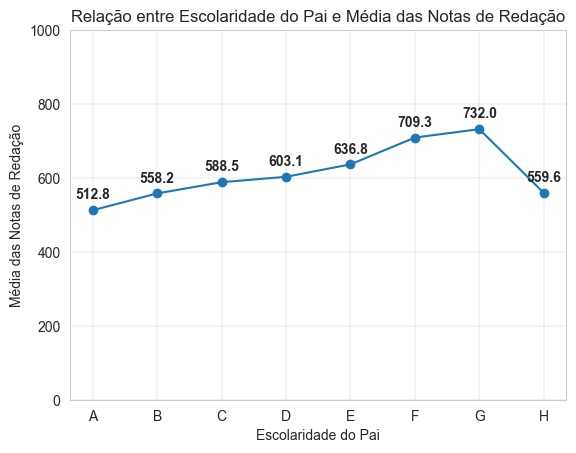

In [160]:
media_escpai_redacao = colunas_redacao_escpai.groupby('Q001')['NU_NOTA_REDACAO'].mean()
plt.plot(media_escpai_redacao.index, media_escpai_redacao.values, marker='o')
plt.xlabel("Escolaridade do Pai")
plt.ylabel("Média das Notas de Redação")
plt.title('Relação entre Escolaridade do Pai e Média das Notas de Redação')
plt.ylim(0, 1000)
plt.grid(linewidth = 0.3)
for i, v in enumerate(media_escpai_redacao.values):
    plt.text(i, v + 30, f'{v:.1f}', ha='center', fontweight='bold')  # v+30 Coloca o valor da porcentagem 30 unidade acima do ponto
plt.show()

In [161]:
colunas_renda_cor = microdadosEnemSelecionado[['Q006', 'TP_COR_RACA']].dropna()
colunas_renda_cor

,Q006,TP_COR_RACA
0,F,1
1,H,1
2,C,1
3,C,3
4,B,3
...,...,...
3933950,F,1
3933951,F,1
3933952,B,3
3933953,N,1


In [201]:
# Criando uma tabela de contingência (contagem de ocorrências para cada combinação de renda e cor/raça)
contagem = colunas_renda_cor.groupby(['Q006', 'TP_COR_RACA']).size().unstack()

In [202]:
contagem

TP_COR_RACA,0,1,2,3,4,5
Q006,,,,,,
A,4373,58899,45549,149827,5259,4146
B,17196,316234,205717,672491,22126,11507
C,8450,226917,99177,302172,10438,3788
D,5690,182113,57445,183800,6381,1937
E,3703,141222,32678,111254,4051,1086
F,2167,89423,16640,60190,2386,538
G,3310,148298,21406,83958,3697,658
H,1799,84999,9674,40432,2042,333
I,1065,53989,5590,23903,1237,186


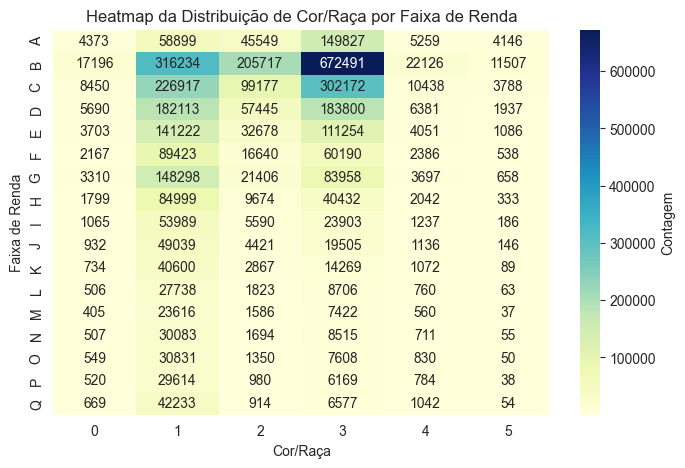

In [171]:
# Aplicar o mapeamento para substituir os valores numéricos pelos rótulos de legenda
colunas_renda_cor_temp = colunas_renda_cor.copy()
colunas_renda_cor_temp['TP_COR_RACA'] = colunas_renda_cor_temp['TP_COR_RACA'].replace(nome_raca)

plt.figure(figsize=(8, 5))
sns.heatmap(contagem, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Contagem'})
plt.xlabel('Cor/Raça')
plt.ylabel('Faixa de Renda')
plt.title('Heatmap da Distribuição de Cor/Raça por Faixa de Renda')
plt.show()

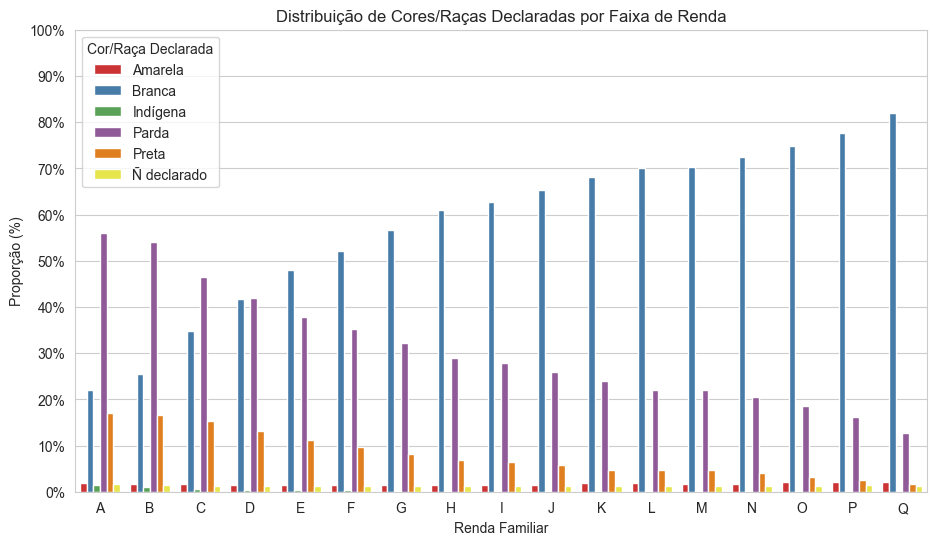

In [193]:
# Aplicar o mapeamento para substituir os valores numéricos pelos rótulos de legenda
colunas_renda_cor_temp = colunas_renda_cor.copy()
colunas_renda_cor_temp['TP_COR_RACA'] = colunas_renda_cor_temp['TP_COR_RACA'].replace(nome_raca)

# Criar o gráfico de barras agrupadas
crosstab = pd.crosstab(colunas_renda_cor_temp['Q006'], colunas_renda_cor_temp['TP_COR_RACA'], normalize='index')*100

plt.figure(figsize=(11, 6))
sns.barplot(x='Q006', y='proportion', hue='TP_COR_RACA', data=crosstab.stack().reset_index(name='proportion'), palette='Set1')
plt.xlabel('Renda Familiar')
plt.ylabel('Proporção (%)')
plt.title('Distribuição de Cores/Raças Declaradas por Faixa de Renda')
plt.legend(title='Cor/Raça Declarada')
plt.ylim(0,100)
plt.yticks(range(0, 110, 10))

# Define o formato do eixo y como porcentagem para que os valores sejam exibidos com o símbolo '%' 
plt.gca().yaxis.set_major_formatter(PercentFormatter())

plt.show()